In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.getcwd()

'/content'

In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [6]:
# calling data from the directory Dataset in my drive folder.
# https://www.kaggle.com/alopez247/pokemon
pokemon_data = pd.read_csv('/content/Pokemon Data.csv')

In [7]:
poke = pd.DataFrame(pokemon_data)
poke.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [8]:
# checking out for null values.
poke.isnull().sum()

,0
Number,0
Name,0
Type_1,0
Type_2,371
Total,0
HP,0
Attack,0
Defense,0
Sp_Atk,0
Sp_Def,0


In [9]:
# from the shape it is clear the dataset is small, meaning we can simply remove the null values columns as filling them can
# make the dataset alittle biased.
poke.shape

(721, 23)

In [10]:
# type_2, egg_group_2 and Pr_male have null values.
poke['Pr_Male'].value_counts()

,count
Pr_Male,
0.500,458
0.875,101
0.000,23
0.250,22
1.000,19
0.750,19
0.125,2


In [11]:
# Since Type_2 and Egg_group_2 columns have so many NULL values we will be removing those columns, you can impute them with other methods too,
# but for simplicity we wont do that here. We are only setting Pr_Male column since it had only 77 missing values.

poke['Pr_Male'].fillna(0.500, inplace=True)
poke['Pr_Male'].isnull().sum()

/tmp/ipython-input-1351472368.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  poke['Pr_Male'].fillna(0.500, inplace=True)


np.int64(0)

In [12]:
poke.tail()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,0.5,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,0.5,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,0.5,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,0.5,Undiscovered,NaN,False,0.51,9.0,3,head_only
720,721,Volcanion,Fire,Water,600,80,110,120,130,90,...,Brown,False,0.5,Undiscovered,NaN,False,1.70,195.0,3,quadruped


In [13]:
# dropping columns

new_poke = poke.drop(['Type_2', 'Egg_Group_2'], axis=1)

In [14]:
# From the data understand each columns type and values.

new_poke.describe()
# (20, 20000) -> x -min/ max-min -> x = 300 -> 300-20/19980 -> a very small value

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.547677,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.189693,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


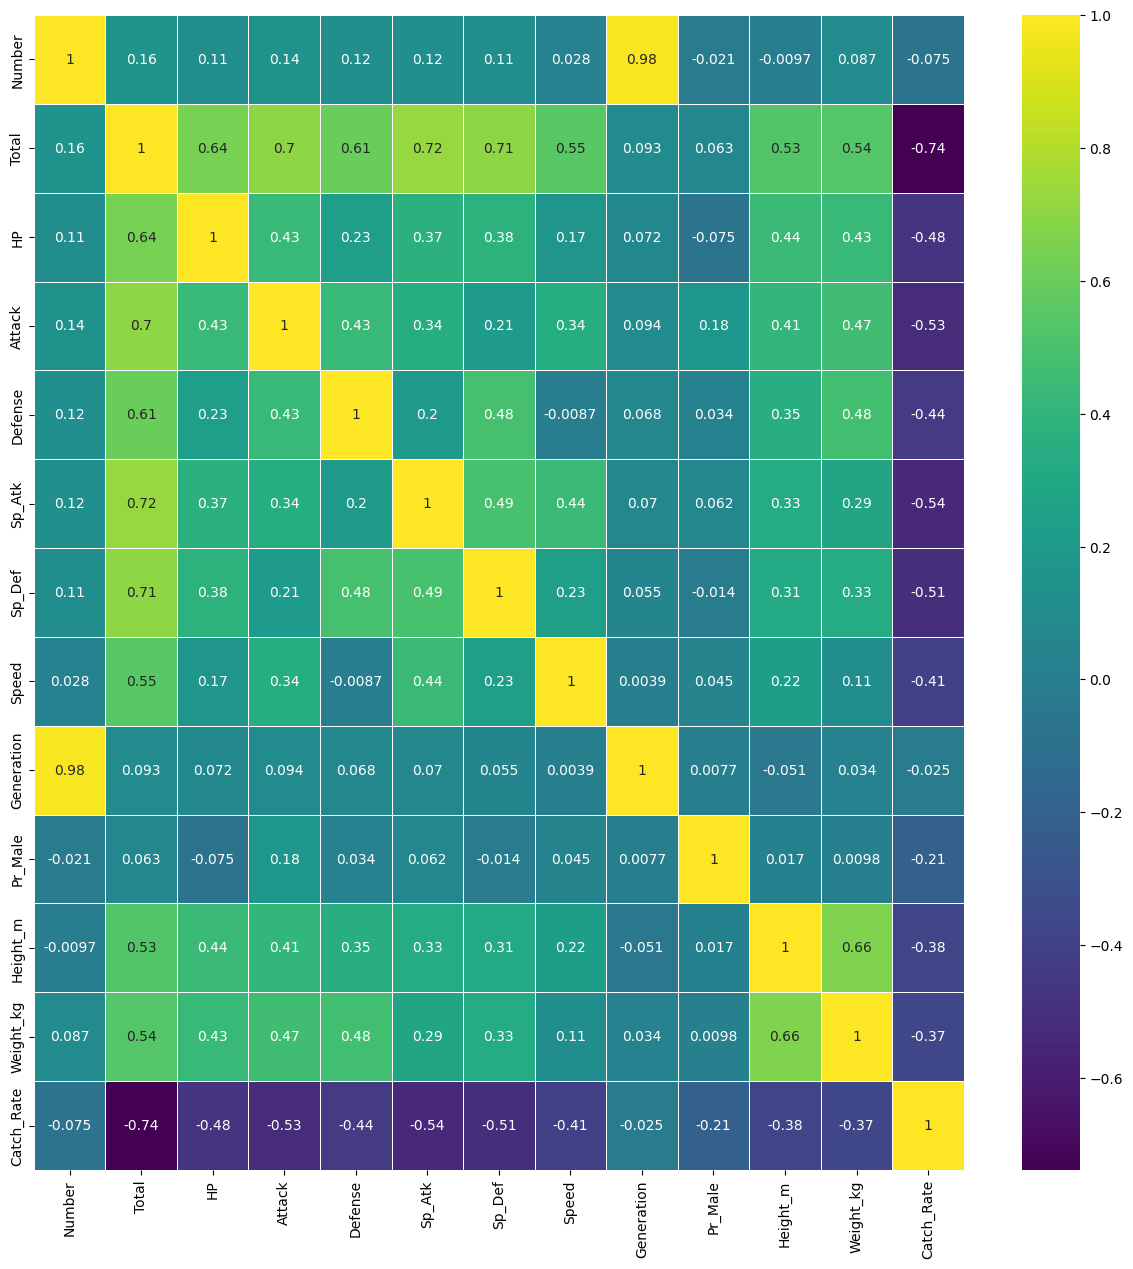

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
corr = new_poke.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="viridis", linewidths=.5)
plt.show()


In [20]:
new_poke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Total             721 non-null    int64  
 4   HP                721 non-null    int64  
 5   Attack            721 non-null    int64  
 6   Defense           721 non-null    int64  
 7   Sp_Atk            721 non-null    int64  
 8   Sp_Def            721 non-null    int64  
 9   Speed             721 non-null    int64  
 10  Generation        721 non-null    int64  
 11  isLegendary       721 non-null    bool   
 12  Color             721 non-null    object 
 13  hasGender         721 non-null    bool   
 14  Pr_Male           721 non-null    float64
 15  Egg_Group_1       721 non-null    object 
 16  hasMegaEvolution  721 non-null    bool   
 1

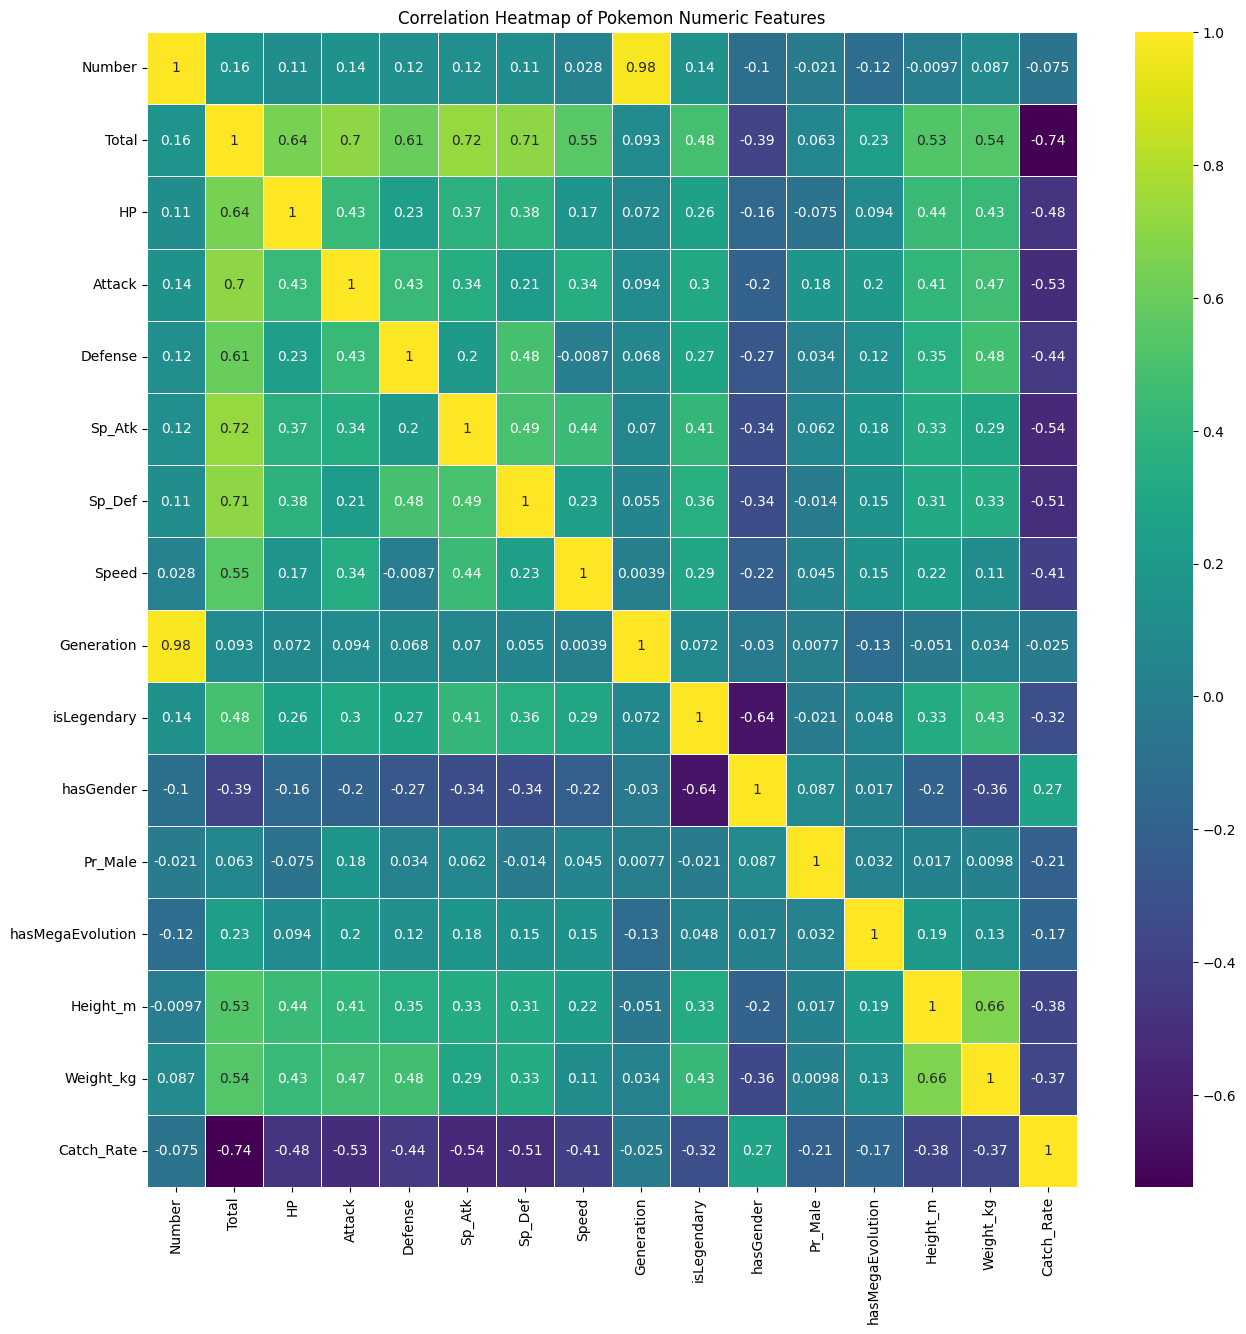

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = new_poke.select_dtypes(include=["int64", "float64", "bool"])

plt.figure(figsize=(15, 15))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="viridis",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Pokemon Numeric Features")
plt.show()


In [23]:
# the above is a correlation graph which tells you how much is a feature correlated to another, sice high correlation means one of the two feature
# is not telling much to the model when predicting.
# Usually it is to be determined by you itself for the value of correlation that is high and is to be removed.

In [24]:
# From the above table it is clear that different features have different ranges of value, which creates complexity for model, so we tone them
# down usually using StandardScalar() class which we will do later on.

In [25]:
# Now try to understand which columns are categorical, they are hidden mines of data and feature engineering is usually done on them.

new_poke['Type_1'].value_counts()

,count
Type_1,
Water,105
Normal,93
Grass,66
Bug,63
Fire,47
Psychic,47
Rock,41
Electric,36
Ground,30


In [26]:
new_poke['Generation'].value_counts()

,count
Generation,
5,156
1,151
3,135
4,107
2,100
6,72


In [27]:
new_poke['Color'].value_counts()

,count
Color,
Blue,134
Brown,110
Green,79
Red,75
Grey,69
Purple,65
Yellow,64
White,52
Pink,41


In [28]:
new_poke['Egg_Group_1'].value_counts()

,count
Egg_Group_1,
Field,169
Monster,74
Water_1,74
Undiscovered,73
Bug,66
Mineral,46
Flying,44
Amorphous,41
Human-Like,37


In [29]:
new_poke['Body_Style'].value_counts()

,count
Body_Style,
bipedal_tailed,158
quadruped,135
bipedal_tailless,109
two_wings,63
head_arms,39
head_only,34
with_fins,31
head_base,30
insectoid,30


In [ ]:
# There are more categorical data, which I have not listed here, can you find those?
# Can you identify, why I have not listed them

In [30]:
# Feature Engineering

# creating new categories or actually merging categories so it is easy for to wrok with afterwards.
# Now this may seem uncomfortable to some but you will get it why I did it like that.

poke_type1 = new_poke.replace(['Water', 'Ice'], 'Water')
poke_type1 = poke_type1.replace(['Grass', 'Bug'], 'Grass')
poke_type1 = poke_type1.replace(['Ground', 'Rock'], 'Rock')
poke_type1 = poke_type1.replace(['Psychic', 'Dark', 'Ghost', 'Fairy'], 'Dark')
poke_type1 = poke_type1.replace(['Electric', 'Steel'], 'Electric')

poke_type1['Type_1'].value_counts()

,count
Type_1,
Grass,129
Water,128
Dark,115
Normal,93
Rock,71
Electric,58
Fire,47
Poison,28
Fighting,25


In [31]:
poke_type1.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,...,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,...,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,...,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,...,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,...,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [32]:
ref1 = dict(poke_type1['Body_Style'].value_counts())

poke_type1['Body_Style_new'] = poke_type1['Body_Style'].map(ref1)

In [33]:
# You may be wondering what I did, I took the value counts of each body type and replced the body type with the numbers, see below
poke_type1['Body_Style_new'].head()

,Body_Style_new
0,135
1,135
2,135
3,158
4,158


In [34]:
poke_type1['Body_Style'].head()

,Body_Style
0,quadruped
1,quadruped
2,quadruped
3,bipedal_tailed
4,bipedal_tailed


In [35]:
# encoding data - features like Type_1 and Color

In [36]:
types_poke = pd.get_dummies(poke_type1['Type_1'])
color_poke = pd.get_dummies(poke_type1['Color'])

X = pd.concat([poke_type1, types_poke], axis=1)
X = pd.concat([X, color_poke], axis=1)

X.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,...,False,False,False,True,False,False,False,False,False,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,...,False,False,False,True,False,False,False,False,False,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,...,False,False,False,True,False,False,False,False,False,False
3,4,Charmander,Fire,309,39,52,43,60,50,65,...,False,False,False,False,False,False,False,True,False,False
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,...,False,False,False,False,False,False,False,True,False,False


In [37]:
# Now we have build some features and extracted some feature data, whats left is to remove redundant features
X.columns

Index(['Number', 'Name', 'Type_1', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color',
       'hasGender', 'Pr_Male', 'Egg_Group_1', 'hasMegaEvolution', 'Height_m',
       'Weight_kg', 'Catch_Rate', 'Body_Style', 'Body_Style_new', 'Dark',
       'Dragon', 'Electric', 'Fighting', 'Fire', 'Flying', 'Grass', 'Normal',
       'Poison', 'Rock', 'Water', 'Black', 'Blue', 'Brown', 'Green', 'Grey',
       'Pink', 'Purple', 'Red', 'White', 'Yellow'],
      dtype='object')

In [38]:
X_ = X.drop(['Number', 'Name', 'Type_1', 'Color', 'Egg_Group_1'], axis = 1)
X_.shape

(721, 38)

In [39]:
X.shape

(721, 43)

In [40]:
# creating and training our model

In [41]:
# Lastly we define our target variable and set it into a variable called y
y = X_['isLegendary']
X_final = X_.drop(['isLegendary', 'Body_Style'], axis = 1)

In [42]:
X_final.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'hasGender', 'Pr_Male', 'hasMegaEvolution', 'Height_m',
       'Weight_kg', 'Catch_Rate', 'Body_Style_new', 'Dark', 'Dragon',
       'Electric', 'Fighting', 'Fire', 'Flying', 'Grass', 'Normal', 'Poison',
       'Rock', 'Water', 'Black', 'Blue', 'Brown', 'Green', 'Grey', 'Pink',
       'Purple', 'Red', 'White', 'Yellow'],
      dtype='object')

In [43]:
X_final.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,Pr_Male,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,318,45,49,49,65,65,45,1,True,0.875,...,False,False,False,True,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,True,0.875,...,False,False,False,True,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,True,0.875,...,False,False,False,True,False,False,False,False,False,False
3,309,39,52,43,60,50,65,1,True,0.875,...,False,False,False,False,False,False,False,True,False,False
4,405,58,64,58,80,65,80,1,True,0.875,...,False,False,False,False,False,False,False,True,False,False


In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_final, y, test_size=0.2)

In [45]:
random_model = RandomForestClassifier(n_estimators=500, random_state = 42)

In [46]:
#Fit
model_final = random_model.fit(Xtrain, ytrain)

y_pred = model_final.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(model_final.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

100.0 %


In [47]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

99.31 %


In [48]:
print(type(ytest))
Ytest = np.array(ytest)

<class 'pandas.core.series.Series'>


In [49]:
print("Target in X columns?", 'target_column_name' in Xtrain.columns)


Target in X columns? False


In [50]:
import pandas as pd

train_hash = pd.util.hash_pandas_object(Xtrain, index=False)
test_hash  = pd.util.hash_pandas_object(Xtest, index=False)

overlap = len(set(train_hash).intersection(set(test_hash)))
print("Overlap rows between train and test:", overlap)


Overlap rows between train and test: 0


In [52]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Separate column types
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(include=["int64", "float64", "bool"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", RandomForestClassifier(n_estimators=500, random_state=42))
])

scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("CV Mean Accuracy:", np.mean(scores))
print("CV Std:", np.std(scores))


CV Mean Accuracy: 0.9958333333333333
CV Std: 0.008333333333333349


In [53]:
type(y_pred)

numpy.ndarray

In [55]:
count = 0
for i in range(len(ytest)):
    if Ytest[i] == y_pred[i]:
        count += 1

print((count / len(ytest)) * 100)


99.3103448275862


In [57]:
# save the model to disk
import pickle
filename = '/content/pokemon_model.pickle'
pickle.dump(model_final, open(filename, 'wb'))

In [ ]:
"""
# load the model from disk
filename = 'drive/MyDrive/Dataset/Models/pokemon_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, ytest)
"""